<a href="https://colab.research.google.com/github/ilayyd/Final-Case/blob/main/K%C4%B1zBa%C5%9F%C4%B1naVeriAnaliziProjesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gerekli kütüphanelerin import edilmesi.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**csv dosyasının okunması ve veriye ilk göz atış.**

In [2]:
df = pd.read_csv("customer_experience_data.csv")
df.head()

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


-Veride kategorik ve sayısal değişkenler mevcut.

**Verisetimizin boyutunu inceleme.**

In [3]:
df.shape

(1000, 14)

1000 kayıt ve 14 sütun içermekte.

**Veriseti hakkında bilgi.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

-Kategorik Değişkenler: Gender, Location, Retention_Status

-Sayısal Değişkenler: Customer_ID, Age, Num_Interactions, Feedback_Score, Products_Purchased, Products_Viewed, Time_Spent_on_Site, Satisfaction_Score, Gender_Encoded, Location_Encoded, Retention_Status_Encoded-

Verisetindeki eşsiz değerlere göz atma.

In [5]:
df.nunique()

,0
Customer_ID,1000
Age,52
Gender,2
Location,3
Num_Interactions,14
Feedback_Score,5
Products_Purchased,19
Products_Viewed,45
Time_Spent_on_Site,1000
Satisfaction_Score,10


**Veriseti istatistikleri.**

In [6]:
df.describe()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


Yaşlar ağırlıklı olarak orta yaşlı müşteri grubuna aittir.

Müşteriler ortalama 7 etkileşim gerçekleştirmiştir, bazıları ise 1-2 etkileşim ile sınırlıdır. Minimum etkileşim 1, maximum etkileşim 14’tür.

Geri bildirim puanları ve memnuniyet skorları genelde ortalamanın üzerindedir, ancak uç değerler de gözlemlenmiştir.

Ürün alma sayısı minimum 1, maksimum 19. Ortalama satın alınan ürün sayısı 10.

Görüntülenen ürün sayısı minimum 5, maksimum 49. Ortalaması 27.

Sitede geçirilen sürede geniş bir dağılım vardır (5–60 dakika). Bu, farklı kullanıcı davranışlarına işaret eder.

Retained kullanıcılar, churned kullanıcılara göre daha fazla.

***KATEGORİK VE SAYISAL DEĞİŞKENLER***

In [7]:
categorical = df.select_dtypes(include=["object", "category"]).columns.tolist()
numerical = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Kategorik:", categorical)
print("Sayısal:", numerical)

Kategorik: ['Gender', 'Location', 'Retention_Status']
Sayısal: ['Customer_ID', 'Age', 'Num_Interactions', 'Feedback_Score', 'Products_Purchased', 'Products_Viewed', 'Time_Spent_on_Site', 'Satisfaction_Score', 'Gender_Encoded', 'Location_Encoded', 'Retention_Status_Encoded']


**Kategorik değişkenlerin sayısal dağılımı:**

In [8]:
for col in categorical:
    print(f"\n{col} dağılımı:")
    print(df[col].value_counts())


Gender dağılımı:
Gender
Male      524
Female    476
Name: count, dtype: int64

Location dağılımı:
Location
Urban       344
Suburban    344
Rural       312
Name: count, dtype: int64

Retention_Status dağılımı:
Retention_Status
Retained    694
Churned     306
Name: count, dtype: int64


**SAYISAL DEĞİŞKENLERİN DAĞILIMI (HİSTOGRAM)**

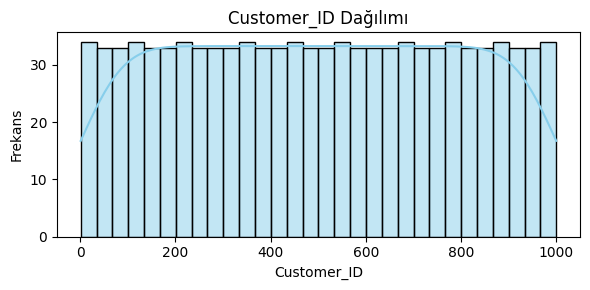

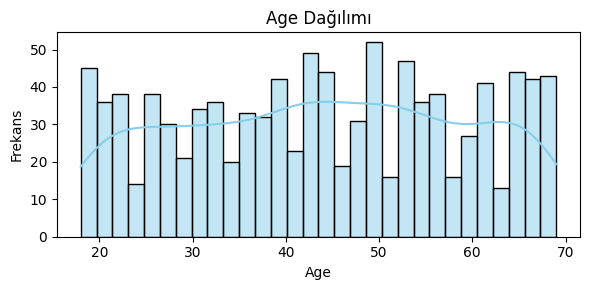

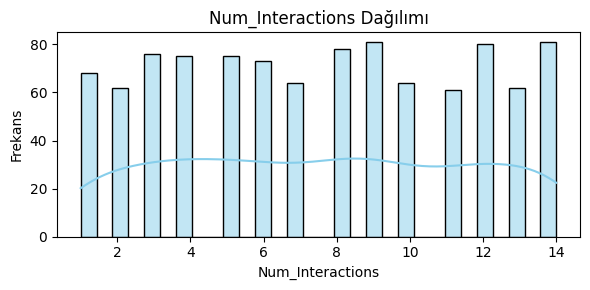

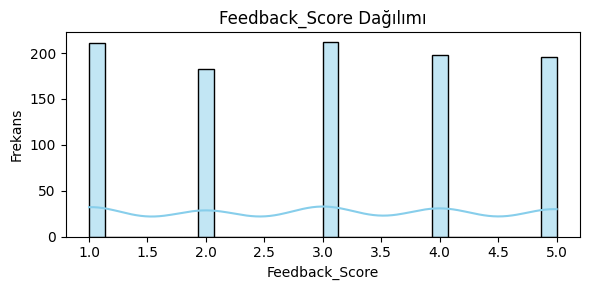

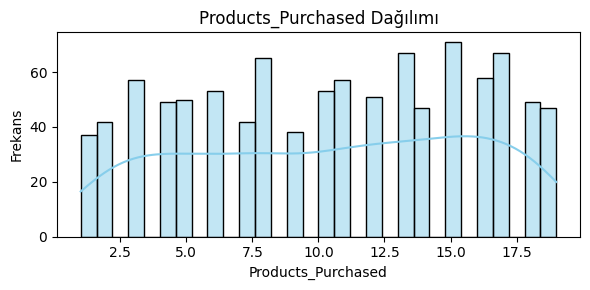

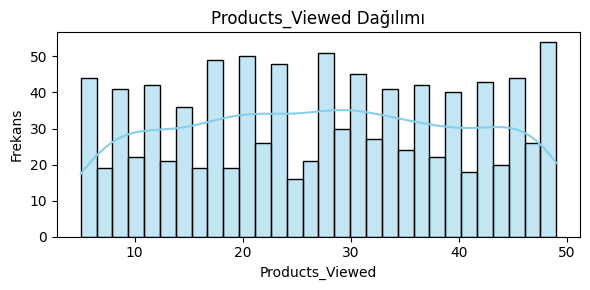

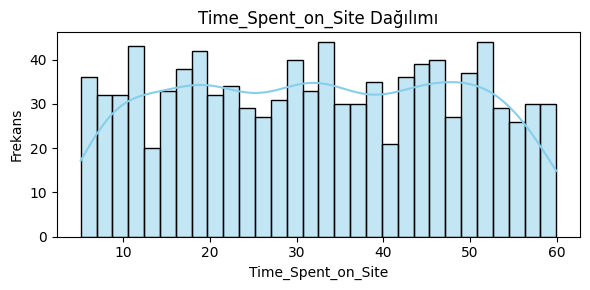

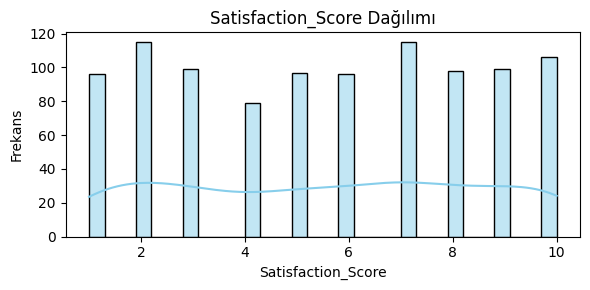

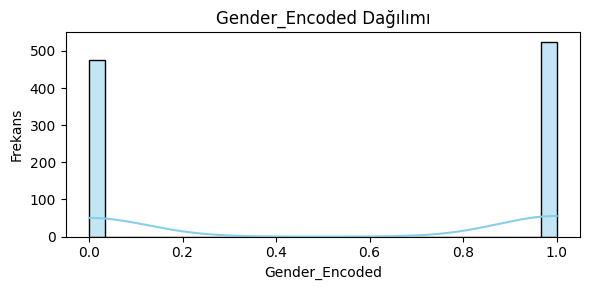

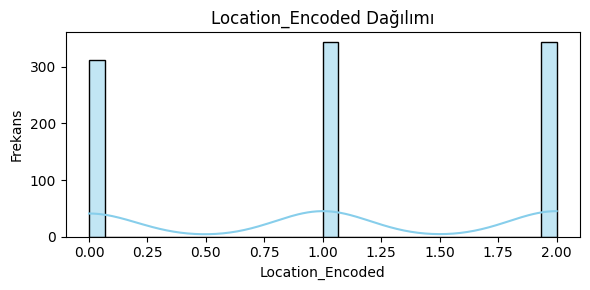

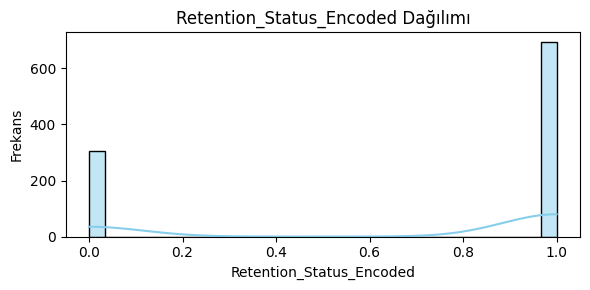

In [9]:
for col in numerical:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"{col} Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.tight_layout()
    plt.show()

1) Age Dağılımı: Yaş 18 ile 70 arasında geniş bir aralıkta dağılmış. Yaş dağılımı simetrik değil.

2)Num_Interactions Dağılımı: Etkileşim sayısı 1–14 aralığında eşit dağılmış gibi görünüyor. Etkileşim sayılarının çoğu eşit sıklıkta gözlendi. Etkileşim sayısı oldukça düzensiz ama dengeli dağılmış, öne çıkan bir etkileşim seviyesi yok.

3)Feedback_Score Dağılımı: Feedback score hemen hemen eşit sıklıkta gözlendi.

4)Products_Purchased Dağılımı: Satın alma sayısı 1 ile 19 arasında. Bazı seviyelerde sıklıklar belirgin yüksek (örneğin 8, 15).

5)Products_Viewed Dağılımı: Grafik düzgün dağılım gösteriyor. Belirgin bir yoğunluk farkı yok.

6)Time_Spent_on_Site Dağılımı: Kullanıcıların büyük kısmı ortalama 30–40 dk arası sitede kalıyor.

7)Satisfaction_Score Dağılımı: Belirgin bi farklılık yok.

**KATEGORİK DEĞİŞKENLERİN SIKLIK GRAFİĞİ (COUNTPLOT)**

/tmp/ipython-input-10-2666155052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


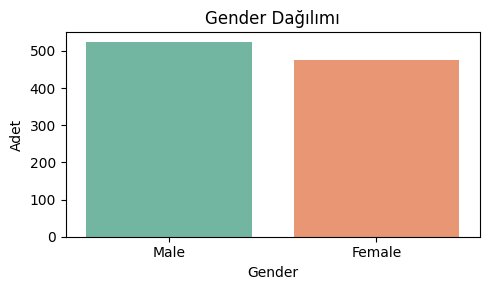

/tmp/ipython-input-10-2666155052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


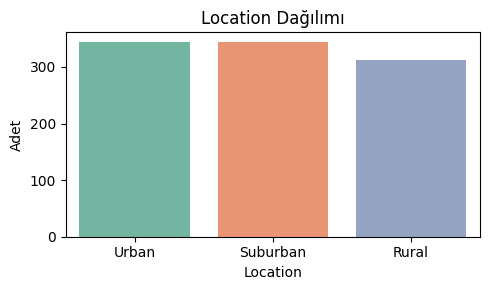

/tmp/ipython-input-10-2666155052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


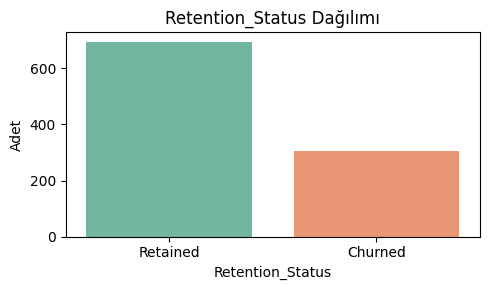

In [10]:
for col in categorical:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"{col} Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Adet")
    plt.tight_layout()
    plt.show()

Retention_Status dağılımında, kullanıcıların büyük bir kısmı elde tutulmuş.

***EKSİK DEĞER ANALİZİ***

In [11]:
missing_counts = df.isnull().sum()
print('Eksik Değer Sayısı:\n', missing_counts)

Eksik Değer Sayısı:
 Customer_ID                 0
Age                         0
Gender                      0
Location                    0
Num_Interactions            0
Feedback_Score              0
Products_Purchased          0
Products_Viewed             0
Time_Spent_on_Site          0
Satisfaction_Score          0
Retention_Status            0
Gender_Encoded              0
Location_Encoded            0
Retention_Status_Encoded    0
dtype: int64


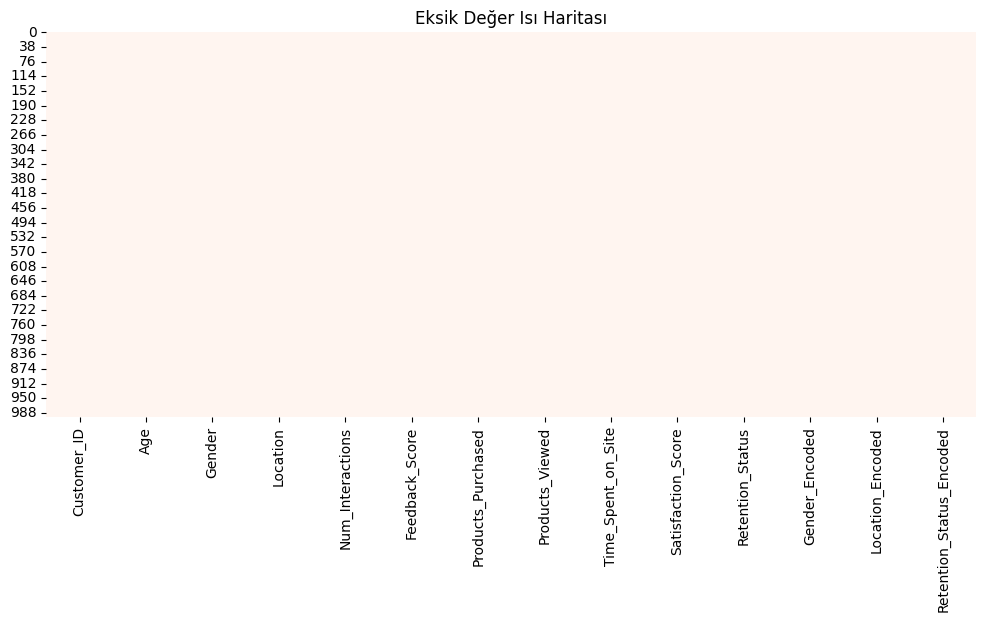

In [12]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Eksik Değer Isı Haritası")
plt.show()

Veri setinde eksik değer bulunmamaktadır.

Eksik veriler varsa, şu yöntemlerden biriyle işlem yapılabilir:

Silme: Eksik verileri içeren satırları/kolonları silebiliriz. Eksik oranı çok düşük olduğu durumlarda kullanılabilir.


Ortalama ile doldurma: Sayısal değerlerde kullanılabilir. Eksik değerler az ve normal dağılım varsa kullanılması uygun.


Mod ile doldurma: Kategorik değişkenlerde kullanılabilir. En sık görülen kategori ile doldurulur.


İleri düzey yöntemler: KNN, regresyon ile tahmin gibi. Eksik oran yüksekse veya daha doğru analiz isteniyorsa kullanılması uygun.

***AYKIRI DEĞER (OUTLIER) ANALİZİ***

1) Box-plot yöntemi:

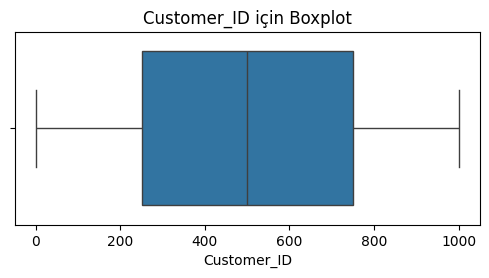

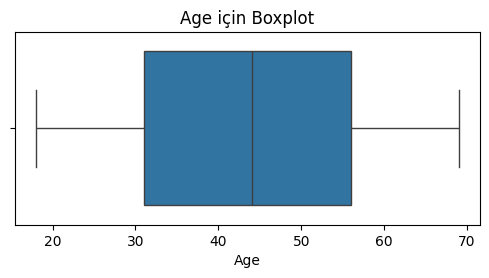

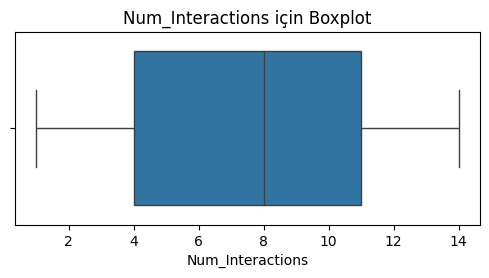

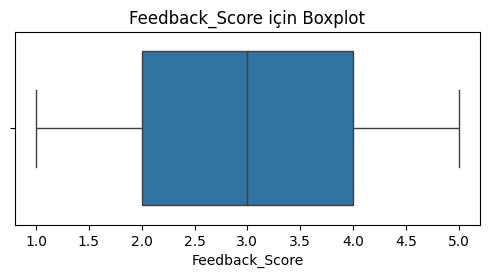

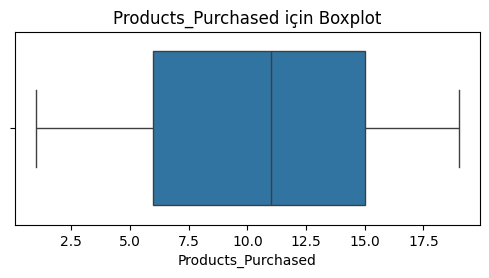

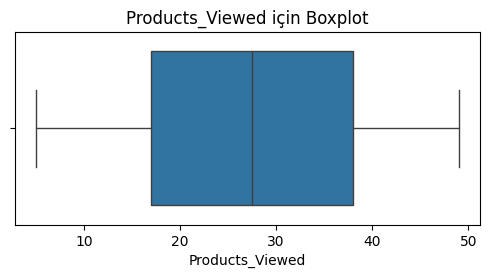

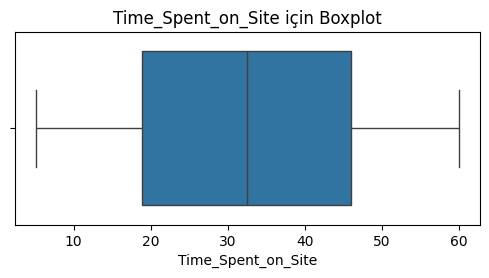

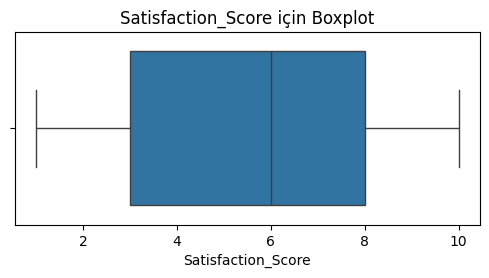

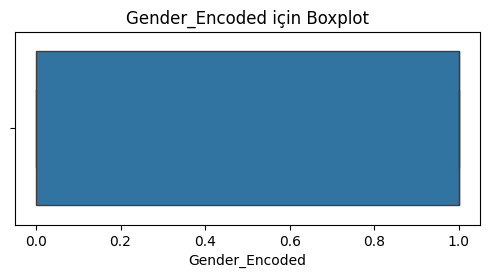

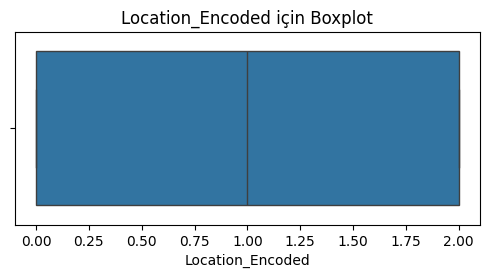

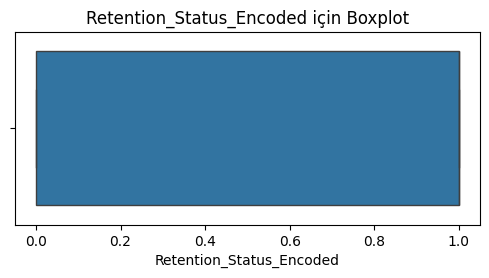

In [13]:
for col in numerical:
    plt.figure(figsize=(6, 2.5))
    sns.boxplot(data=df, x=col)
    plt.title(f"{col} için Boxplot")
    plt.show()

2) Z-skor yöntemi:

In [14]:
from scipy.stats import zscore

z_scores = df[numerical].apply(zscore)
outliers_z = (z_scores.abs() > 2)

outliers_z.sum()

,0
Customer_ID,0
Age,0
Num_Interactions,0
Feedback_Score,0
Products_Purchased,0
Products_Viewed,0
Time_Spent_on_Site,0
Satisfaction_Score,0
Gender_Encoded,0
Location_Encoded,0


3) IQR (Interquartile Range) Yöntemi

In [15]:
Q1 = df[numerical].quantile(0.25)
Q3 = df[numerical].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (df[numerical] < (Q1 - 1.5 * IQR)) | (df[numerical] > (Q3 + 1.5 * IQR))

outliers_iqr.sum()

,0
Customer_ID,0
Age,0
Num_Interactions,0
Feedback_Score,0
Products_Purchased,0
Products_Viewed,0
Time_Spent_on_Site,0
Satisfaction_Score,0
Gender_Encoded,0
Location_Encoded,0


4) Isolation Forest (IF) Yöntemi

In [16]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
df['outlier_iso'] = iso.fit_predict(df[numerical])
df['outlier_iso'] = df['outlier_iso'].map({1: 0, -1: 1})

# outlier sayısı
df['outlier_iso'].value_counts()

,count
outlier_iso,
0,950
1,50


Isolation Forest yönteminde ise contamination değerini 0.5 belirledim. Bu anomali olmasını beklediğimiz veri noktalarının yüzdesidir. Bu sebeple 1000 veri içinden 50 tanesi aykırı olarak tespit edildi.

In [17]:
outliers = df[df['outlier_iso'] == 1]
display(outliers)

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded,outlier_iso
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0,1
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1,1
18,19,19,Male,Urban,1,4,15,6,47.525093,2,Retained,1,2,1,1
20,21,61,Female,Rural,14,1,3,6,6.744737,9,Retained,0,0,1,1
37,38,68,Female,Suburban,6,3,3,16,6.005129,1,Churned,0,1,0,1
40,41,20,Male,Urban,12,1,1,37,59.553906,4,Retained,1,2,1,1
46,47,56,Female,Suburban,2,4,5,46,8.378382,6,Churned,0,1,0,1
54,55,19,Male,Urban,10,5,1,30,51.199877,7,Churned,1,2,0,1
65,66,53,Female,Suburban,1,5,17,6,6.141692,9,Churned,0,1,0,1
100,101,62,Female,Rural,13,5,15,13,17.127983,9,Churned,0,0,0,1


In [18]:
outliers.describe()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded,outlier_iso
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
mean,619.140000,40.580000,7.360000,2.700000,10.540000,26.020000,29.423071,5.340000,0.320000,1.040000,0.280000,1.0
std,377.361896,19.455958,5.129984,1.693324,6.363833,16.198375,19.725697,3.354011,0.471212,0.924938,0.453557,0.0
min,3.000000,18.000000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.000000,1.0
25%,223.500000,20.000000,2.000000,1.000000,4.250000,9.250000,8.608423,2.000000,0.000000,0.000000,0.000000,1.0
50%,795.000000,43.500000,6.000000,2.000000,11.500000,24.500000,26.156016,6.000000,0.000000,1.000000,0.000000,1.0
75%,944.750000,60.750000,13.000000,4.000000,16.000000,43.000000,49.497130,8.750000,1.000000,2.000000,1.000000,1.0
max,1000.000000,69.000000,14.000000,5.000000,19.000000,49.000000,59.553906,10.000000,1.000000,2.000000,1.000000,1.0


Num_Interactions sayısı çok az veya çok fazla, Products_Purchased sayısı çok az veya çok fazla, Products_Viewed sayısı çok az veya çok fazla, Time_Spent_on_Site çok az veya çok fazla, Satisfaction_Score çok az veya çok fazla olduğu görülüyor.  

Bu aykırılar doğal müşteri davranışlarını yansıtıyor olabilir örneğin sadık, çok ürün alan müşteriler. İş bağlamında anlamlı oldukları sürece silinmemeli, ayrı olarak incelenmelidir.

**Aykırılık durumu için görselleştirmeler:**

1)Age vs Time Spent on Site:

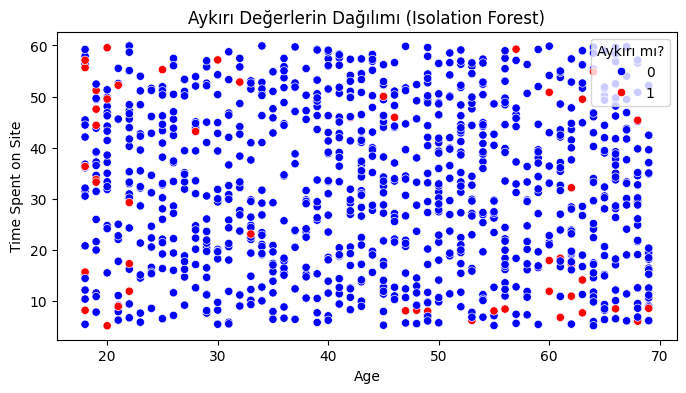

In [22]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Age', y='Time_Spent_on_Site', hue='outlier_iso', palette={0: 'blue', 1: 'red'})
plt.title("Aykırı Değerlerin Dağılımı (Isolation Forest)")
plt.xlabel("Age")
plt.ylabel("Time Spent on Site")
plt.legend(title='Aykırı mı?')
plt.show()

Grafiğin sağ üst ve sol alt köşelerinde (yaş ve zamanın uç noktalarında) daha fazla kırmızı (aykırı) nokta yer alıyor.

Aykırı değerler tüm yaş ve zaman aralığında dağınık şekilde yer alıyor. Ancak özellikle uç yaş gruplarında (18–25 ve 65–70) ve süre olarak çok kısa (<10 dk) ya da çok uzun (>50 dk) kullanıcılar daha fazla aykırı olarak işaretlenmiş.

2) Ziyaret Süresi vs Görüntülenen Ürün Sayısı:

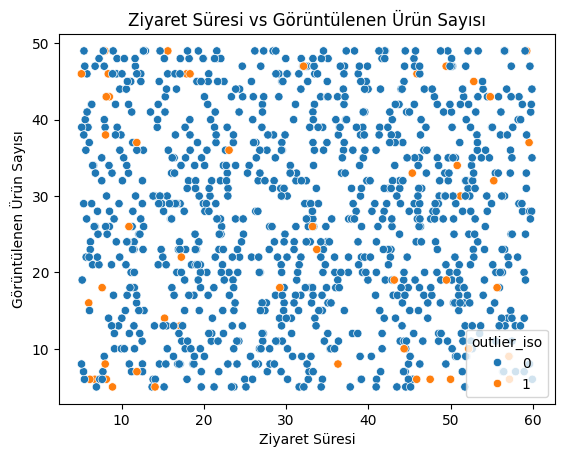

In [23]:
sns.scatterplot(data=df, x='Time_Spent_on_Site', y='Products_Viewed', hue='outlier_iso')
plt.title("Ziyaret Süresi vs Görüntülenen Ürün Sayısı")
plt.xlabel("Ziyaret Süresi")
plt.ylabel("Görüntülenen Ürün Sayısı")
plt.show()

Görüntülenen ürün sayısı çok az (<10) ve ziyaret süresi çok düşük ya da çok yüksek olan kullanıcılar genellikle aykırı.

Ayrıca ziyaret süresi normal aralıkta olup çok fazla ürün görüntüleyen (40–50 ürün) bazı kullanıcılar da aykırı olarak algılanmış.

Grafiğin alt köşesinde ve sağ üst köşesinde yer alan turuncu noktalar bu davranışlara örnek.

3) Retention Durumuna Göre Aykırı Dağılımı:

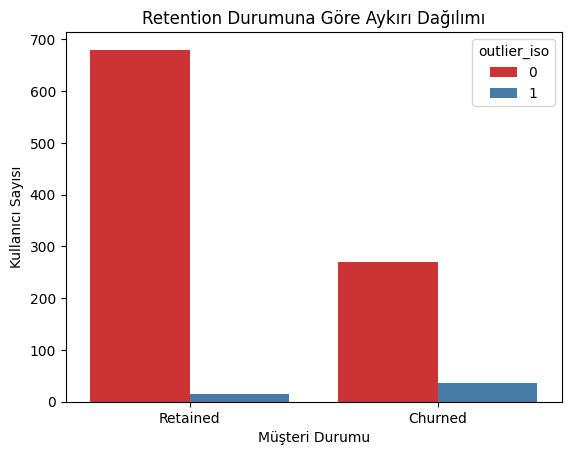

In [24]:
sns.countplot(data=df, x='Retention_Status', hue='outlier_iso', palette='Set1')
plt.title("Retention Durumuna Göre Aykırı Dağılımı")
plt.xlabel("Müşteri Durumu")
plt.ylabel("Kullanıcı Sayısı")
plt.show()

Hem Retained (Elde Tutulan) hem de Churned (Kaybedilen) kullanıcılar arasında aykırı değerler var. Ancak churned olanlar arasında daha fazla aykırı kullanıcı var. Buradan da churned kullanıcılar daha aykırı davranmıştır sonucu çıkarılabilir.

4) Satisfaction Score vs Time Spent:

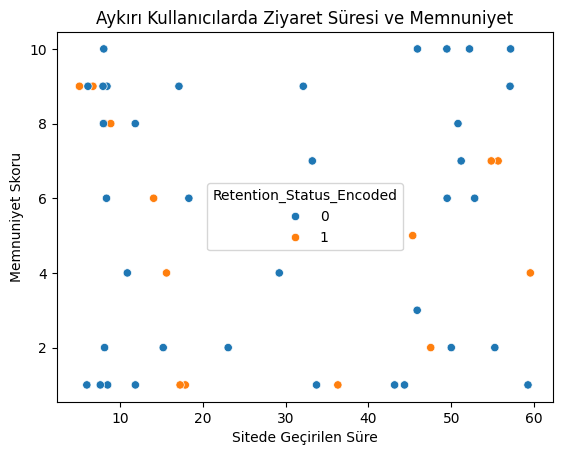

In [25]:
sns.scatterplot(data=outliers, x="Time_Spent_on_Site", y="Satisfaction_Score", hue="Retention_Status_Encoded")
plt.title("Aykırı Kullanıcılarda Ziyaret Süresi ve Memnuniyet")
plt.xlabel("Sitede Geçirilen Süre")
plt.ylabel("Memnuniyet Skoru")
plt.show()

Grafikte yüksek memnuniyet (10) puanı olan kullanıcılar hem kısa süreli hem uzun süreli kalmış. Ayrıca düşük memnuniyet puanları da tüm sürelerde gözleniyor.

Sitede geçirilen sürenin memnuniyete doğrudan bir etkisi yok gibi. Hem düşük hem yüksek memnuniyet skoru aykırı kullanıcılarda mevcut.

5) Aykırı ve Normal Kullanıcıların Görüntülediği Ürün Sayısı:

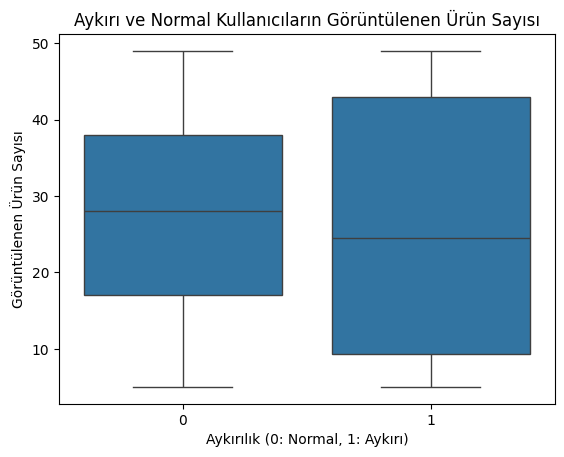

In [26]:
df['outlier_iso'] = df['outlier_iso'].astype(int)
sns.boxplot(data=df, x='outlier_iso', y='Products_Viewed')
plt.title("Aykırı ve Normal Kullanıcıların Görüntülenen Ürün Sayısı")
plt.xlabel("Aykırılık (0: Normal, 1: Aykırı)")
plt.ylabel("Görüntülenen Ürün Sayısı")
plt.show()

Boxplot’ta sağdaki (aykırı) grubun kutusu daha geniş; min. değeri daha küçük (~8), max. değeri ise normal gruba göre daha büyük (~45).

Aykırı kullanıcılar daha geniş aralıkta ürün görüntülemiş. (Min. daha düşük, max. daha yüksek). Ancak median (orta değer) yaklaşık aynı.

***ANALİZ İÇİN DAHA FAZLA GÖRSELLEŞTİRME***

**Müşteri elde tutma durumuna göre sayısal değişkenlerin nasıl değiştiğini analiz etmek için:**

/tmp/ipython-input-27-2132125907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Retention_Status", y=col, palette="pastel")


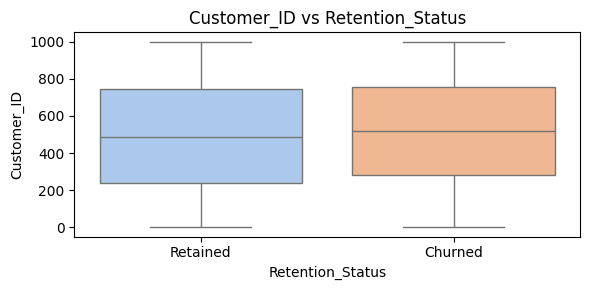

/tmp/ipython-input-27-2132125907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Retention_Status", y=col, palette="pastel")


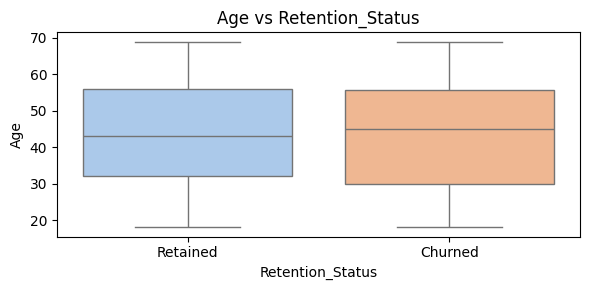

/tmp/ipython-input-27-2132125907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Retention_Status", y=col, palette="pastel")


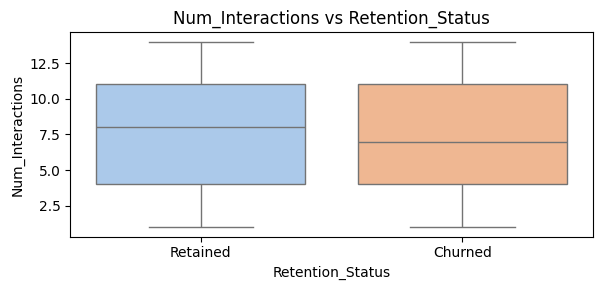

/tmp/ipython-input-27-2132125907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Retention_Status", y=col, palette="pastel")


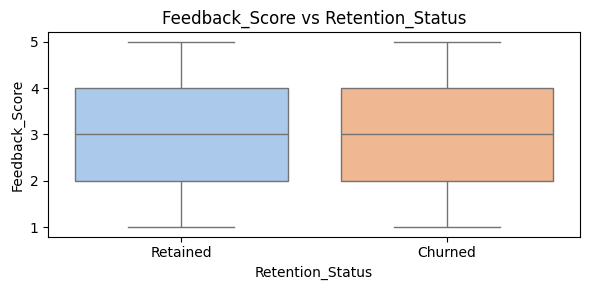

/tmp/ipython-input-27-2132125907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Retention_Status", y=col, palette="pastel")


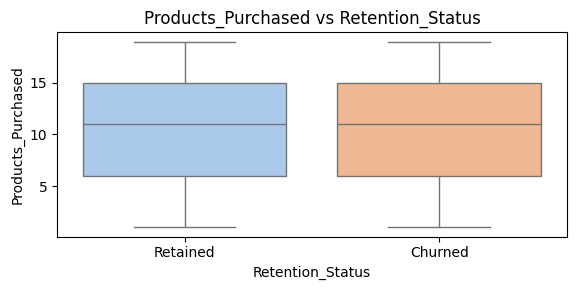

/tmp/ipython-input-27-2132125907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Retention_Status", y=col, palette="pastel")


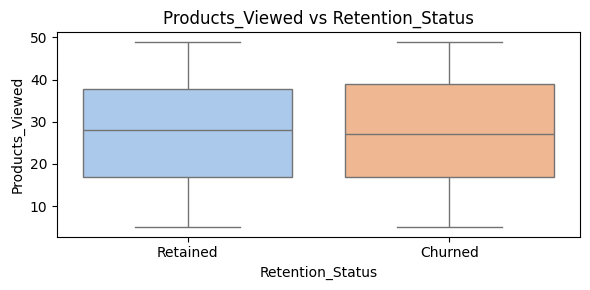

/tmp/ipython-input-27-2132125907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Retention_Status", y=col, palette="pastel")


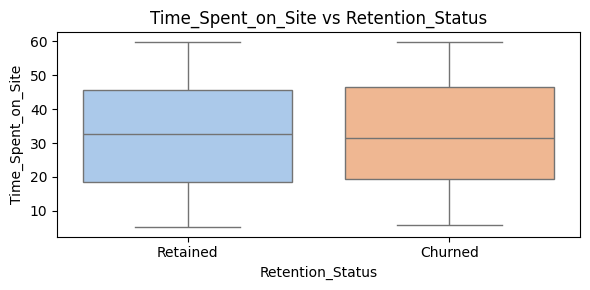

/tmp/ipython-input-27-2132125907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Retention_Status", y=col, palette="pastel")


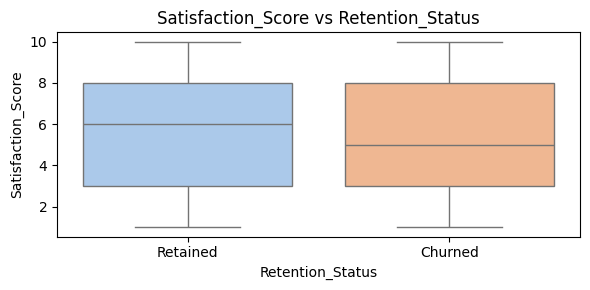

/tmp/ipython-input-27-2132125907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Retention_Status", y=col, palette="pastel")


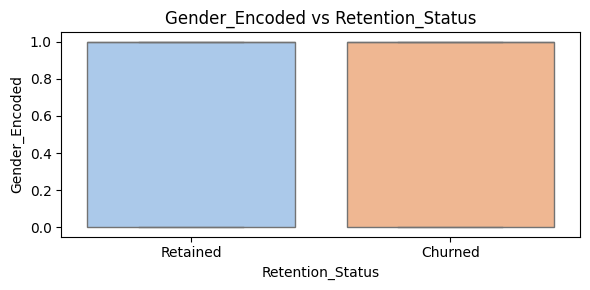

/tmp/ipython-input-27-2132125907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Retention_Status", y=col, palette="pastel")


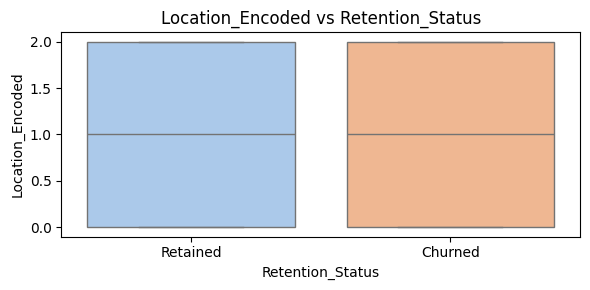

/tmp/ipython-input-27-2132125907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Retention_Status", y=col, palette="pastel")


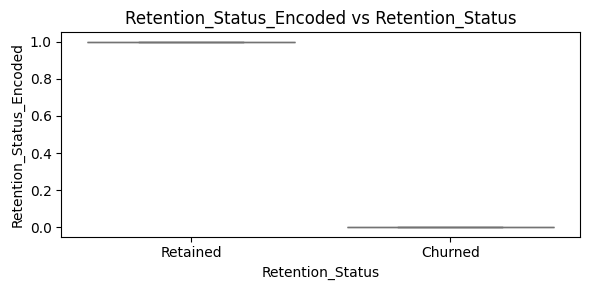

In [27]:
for col in numerical:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x="Retention_Status", y=col, palette="pastel")
    plt.title(f"{col} vs Retention_Status")
    plt.tight_layout()
    plt.show()

1. Age vs Retention_Status: Ortanca yaş her iki grupta da yaklaşık 45. Ancak Retained müşterilerin yaş aralığı biraz daha geniş. Genç ve yaşlı kullanıcılar her iki grupta da var, ancak orta yaş grubunda yoğunluk dikkat çekiyor.

2. Num_Interactions vs Retention_Status: Sadık müşteriler, ortalama olarak daha fazla etkileşime girmiş.Ortanca etkileşim sayısı Retained grubunda daha yüksek. Bu, daha fazla iletişim veya etkileşim kuran müşterilerin daha sadık olduğunu gösterebilir.
Öneri: Etkileşim sayısını artırmak sadakati teşvik edebilir.

3. Feedback_Score vs Retention_Status: İki grafik de neredeyse birbiri ile aynı. Feedback score'un retained - churned kullanıcılar için bi etkisi yok gibi.

4. Products_Purchased vs Retention_Status: İki grafik de birbiriyle çok benzer. Sadık müşteriler daha fazla ürün alıyor diyemeyiz.

5. Products_Viewed vs Retention_Status: Her iki grubun ürün görüntüleme dağılımları neredeyse aynıdır. Bu metrik, müşterilerin sadık olup olmadığını tahmin etmek için çok etkili görünmüyor.

6. Time_Spent_on_Site vs Retention_Status: Sadık kalan müşteriler sitede daha fazla zaman geçiriyor. Ortalama ve ortanca değer retained grubunda daha yüksek.
Bu durum, daha fazla zaman geçiren müşterilerin bağlılık geliştirme ihtimalinin arttığını gösterebilir. Kullanıcı deneyimini artırmak bu süreyi uzatabilir.

7. Satisfaction_Score vs Retention_Status: Bu grafik en güçlü ayrımı gösteriyor. Retained müşteriler çok daha yüksek memnuniyet puanlarına sahip (ortanca ~6), churned müşterilerde ise bu değer ~4.5 civarında. Sadakatin en güçlü belirleyicilerinden biri müşteri memnuniyetidir.

**Products_Purchased ve Feedback_Score Arasındaki İlişki:**

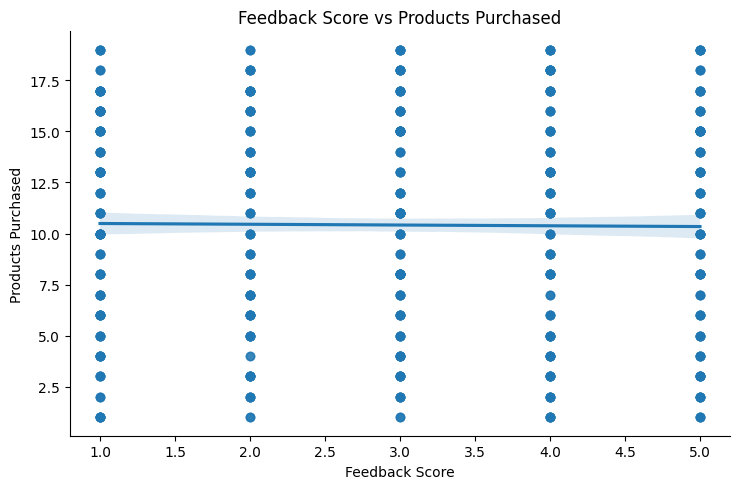

In [28]:
sns.lmplot(x="Feedback_Score", y="Products_Purchased", data=df, aspect=1.5, scatter_kws={"alpha":0.5})
plt.title("Feedback Score vs Products Purchased")
plt.xlabel("Feedback Score")
plt.ylabel("Products Purchased")
plt.tight_layout()
plt.show()

Scatter plot’ta regresyon çizgisi neredeyse düz → Korelasyon çok zayıf.
Tüm skorlarda düşükten yükseğe birçok satın alma mevcut → Bu da Feedback_Score arttıkça ürün satın alma artıyor diyemeyiz demek.
Sonuç olarak feedback puanı ile satın alma sayısı arasında anlamlı bir doğrusal ilişki gözlenmemektedir.

**Products_Viewed ve Products_Purchased Arasındaki İlişki:**

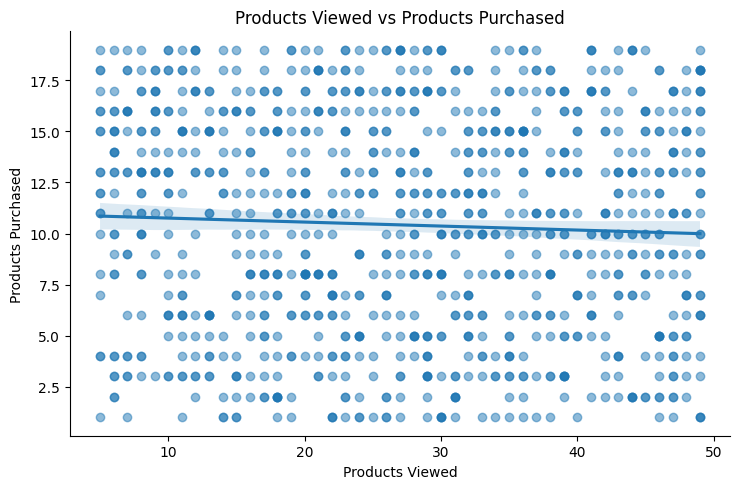

In [29]:
sns.lmplot(x="Products_Viewed", y="Products_Purchased", data=df, aspect=1.5, scatter_kws={"alpha":0.5})
plt.title("Products Viewed vs Products Purchased")
plt.xlabel("Products Viewed")
plt.ylabel("Products Purchased")
plt.tight_layout()
plt.show()

Noktalar homojen dağılmış, kümelenme yok.
Regresyon çizgisi çok hafif eğimli aşağı doğru → çok zayıf negatif ilişki olabilir.
10 ürün görüntüleyen de 18 ürün satın alabiliyor, 50 görüntüleyen de sadece 3 ürün alabiliyor.
Sonuç olarak ürün görüntüleme sayısı ile satın alma arasında belirgin bir korelasyon yok.

**Time_Spent_on_Site ve Products_Purchased Arasındaki İlişki:**

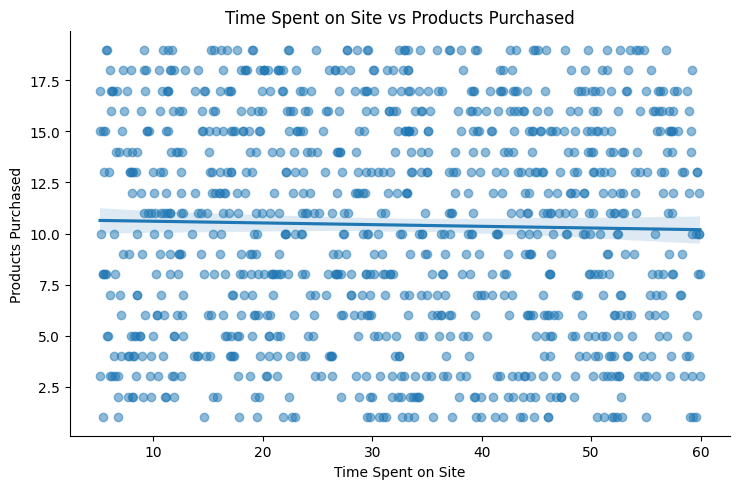

In [30]:
sns.lmplot(x="Time_Spent_on_Site", y="Products_Purchased", data=df, aspect=1.5, scatter_kws={"alpha":0.5})
plt.title("Time Spent on Site vs Products Purchased")
plt.xlabel("Time Spent on Site")
plt.ylabel("Products Purchased")
plt.tight_layout()
plt.show()

Aşağı doğru çok hafif eğimli bir çizgi var.
Sonuç: Zayıf ama negatif bir ilişki olabilir, daha fazla zaman geçiren kullanıcılar daha az satın alma yapma eğiliminde olabilir.

**Products_Purchased ve Satisfaction_Score Arasındaki İlişki:**

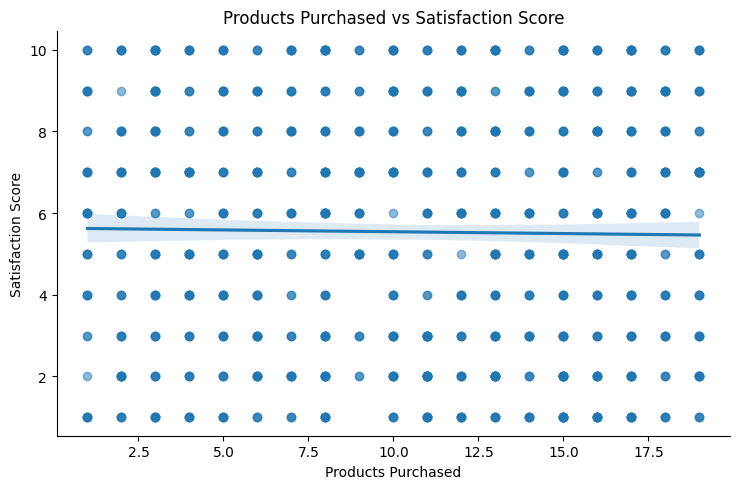

In [31]:
sns.lmplot(x="Products_Purchased", y="Satisfaction_Score", data=df, aspect=1.5, scatter_kws={"alpha":0.5})
plt.title("Products Purchased vs Satisfaction Score")
plt.xlabel("Products Purchased")
plt.ylabel("Satisfaction Score")
plt.tight_layout()
plt.show()

1’den 10’a kadar Satisfaction Score için her ürün satın alma seviyesi eşit dağılmış gibi. Yani ürün çok alan da memnun olmayabilir; az alan da memnun olabilir.

Regresyon çizgisi düz, eğim yok. Satisfaction_Score ile Products_Purchased arasında belirgin ilişki yok.

**Num_Interactions ve Products_Purchased Arasındaki İlişki:**

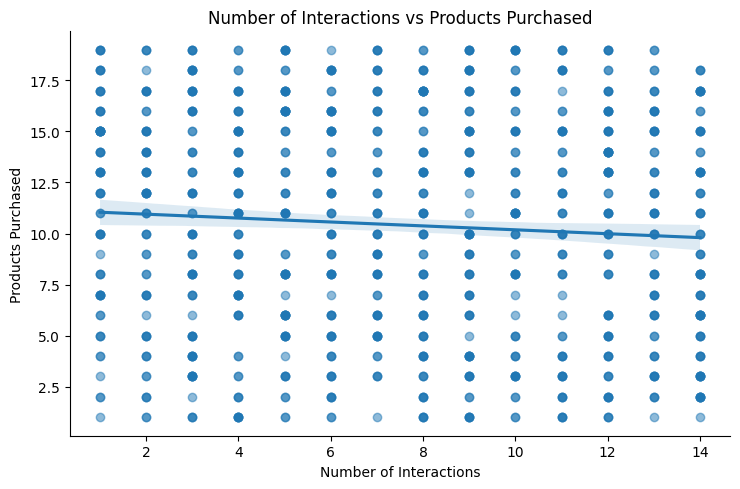

In [32]:
sns.lmplot(x="Num_Interactions", y="Products_Purchased", data=df, aspect=1.5, scatter_kws={"alpha":0.5})
plt.title("Number of Interactions vs Products Purchased")
plt.xlabel("Number of Interactions")
plt.ylabel("Products Purchased")
plt.tight_layout()
plt.show()

Regresyon çizgisi çok hafif aşağı eğimli → daha fazla etkileşim daha az satın alma ile ilişkilendiriliyor gibi.

**Sayısal değişkenler arasındaki ilişkiler için korelasyon matrisi:**

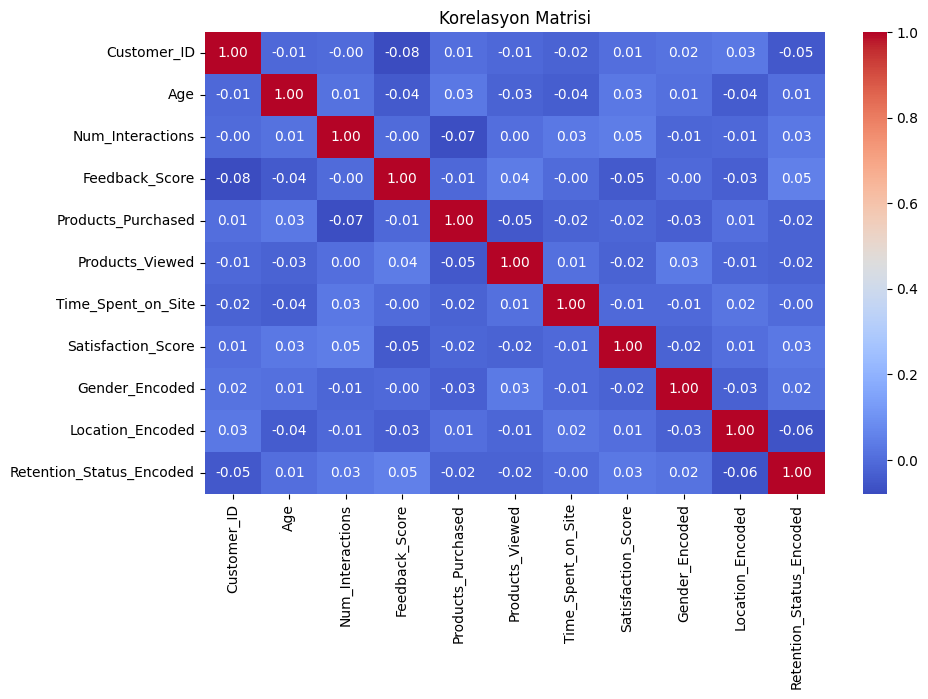

In [33]:
plt.figure(figsize=(10, 6))
corr = df[numerical].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

Matriste tüm korelasyon katsayıları -0.08 ile +0.05 arasında, yani değişkenler arasında güçlü veya orta düzeyde bir doğrusal ilişki bulunmuyor.